<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [8]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import numpy as np

#### Read the dataset in the csv file from the URL


In [9]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [10]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


Text(0.5, 1.0, 'Median value of owner-occupied homes')

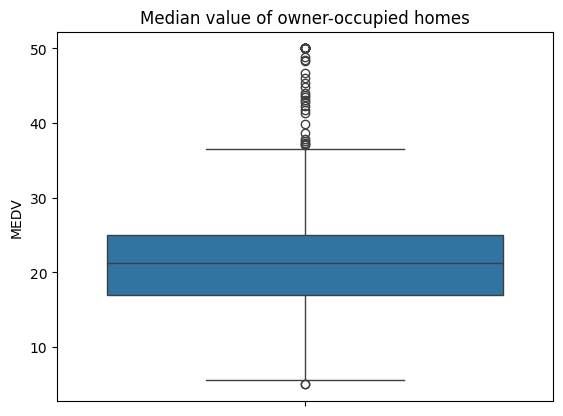

In [11]:
# Task2: For the "Median value of owner-occupied homes" provide a boxplot

sns.boxplot(y="MEDV", data=boston_df)
pyplot.title("Median value of owner-occupied homes")

Text(0.5, 1.0, 'Bar plot for the Charles river variable')

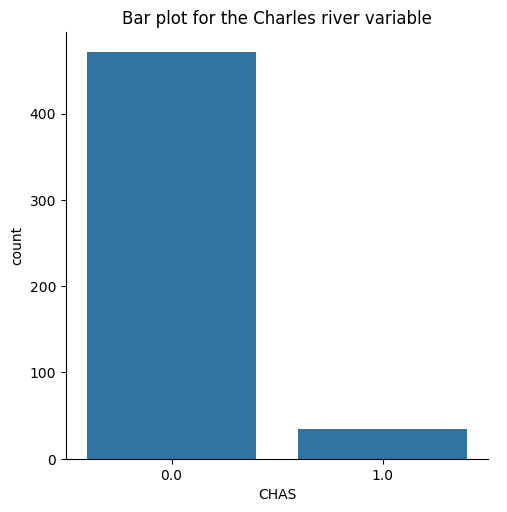

In [12]:
# Task2: Provide a bar plot for the Charles river variable

sns.catplot(x="CHAS", kind="count", data=boston_df)
pyplot.title("Bar plot for the Charles river variable")

Text(0.5, 1.0, 'Boxplot for the MEDV variable vs the AGE variable')

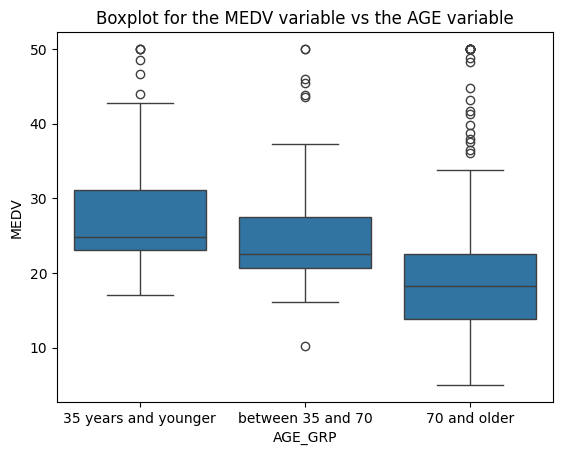

In [13]:
# Task 2: Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
# Note: In my view that question does not make sense since the AGE variable is defined as "proportion of owner-occupied units built prior to 1940" --> We can not bucket this variable as requested in the assignment
boston_df["AGE_GRP"] = np.select([(boston_df["AGE"] <= 35), 
                                  (boston_df["AGE"] > 35) & (boston_df["AGE"] <= 70)], 
                                 ["35 years and younger", "between 35 and 70"], "70 and older")

sns.boxplot(x="AGE_GRP", y="MEDV", data=boston_df, order=["35 years and younger", "between 35 and 70", "70 and older"])
pyplot.title("Boxplot for the MEDV variable vs the AGE variable")

positive correlation between Nitric oxide concentrations and the proportion of non-retail business acres per town


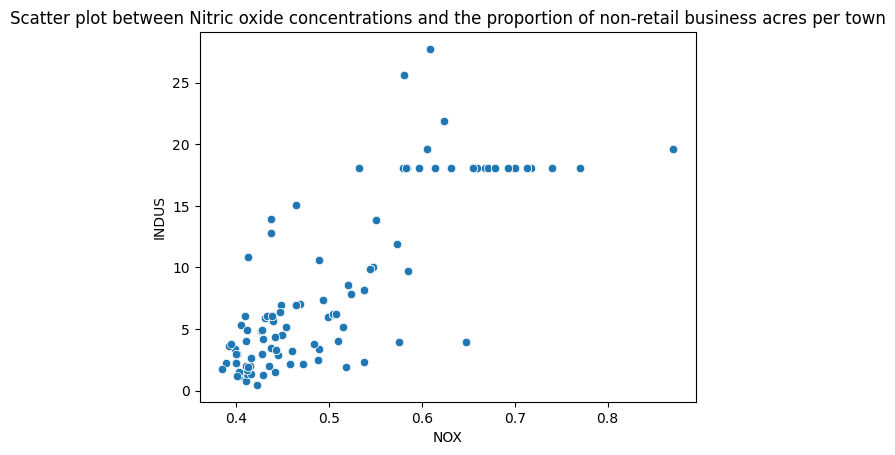

In [14]:
# Task 2: Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

sns.scatterplot(x="NOX", y="INDUS", data=boston_df)
pyplot.title("Scatter plot between Nitric oxide concentrations and the proportion of non-retail business acres per town")
np.corrcoef(x=boston_df["NOX"], y=boston_df["INDUS"])

print("positive correlation between Nitric oxide concentrations and the proportion of non-retail business acres per town")

Text(0.5, 1.0, 'Histogram for the pupil to teacher ratio variable')

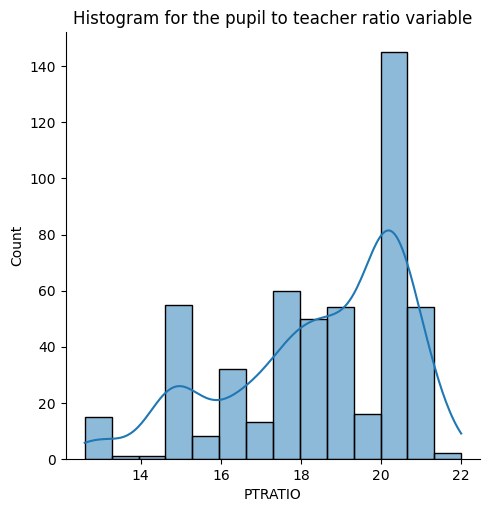

In [15]:
# Task 2: Create a histogram for the pupil to teacher ratio variable

sns.displot(x="PTRATIO", data=boston_df, kde=True)
pyplot.title("Histogram for the pupil to teacher ratio variable")

In [16]:
# Task 3: Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

# H0: There is no significant difference in median value of houses bounded by the Charles river or not (mu_bounded = mu_not_bounded)
# H1: There is a significant difference in median value of houses bounded by the Charles river or not (mu_bounded != mu_not_bounded)

# Levene's Test:
scipy.stats.levene(boston_df[boston_df["CHAS"] == 0]["MEDV"],
                  boston_df[boston_df["CHAS"] == 1]["MEDV"], center="mean")
# pvalue=0.003238119367639829 < 5% --> we assume the variances to be unequal (pvalue below 5%)

# T-test:
scipy.stats.ttest_ind(boston_df[boston_df["CHAS"] == 0]["MEDV"],
                  boston_df[boston_df["CHAS"] == 1]["MEDV"], equal_var=False)
# pvalue=0.003567170098137517 < 5% --> We reject H0 and conclude that there is a significant difference in the median value of houses bounded by the Charles river or not

TtestResult(statistic=-3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

In [17]:
# Task 3: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

# To run ANOVA I will define AGE buckets (and not use the ones as defined above)
# Get quantiles of AGE variable
boston_df.describe()

# Cluster
boston_df["AGE_GRP_QUANTILE"] = np.select([(boston_df["AGE"] <= 45.025000), 
                                  (boston_df["AGE"] > 45.025000) & (boston_df["AGE"] <= 77.500000),
                                  (boston_df["AGE"] > 77.500000) & (boston_df["AGE"] <= 94.075000)], 
                                 ["0-25% Quantile", "25-50% Quantile", "50-75% Quantile"], "75-100% Quantile")

# H0: There is no significant difference in median value for each proportion of owner occupied units built prior to 1940 
# H1: There is a significant difference in median value for each proportion of owner occupied units built prior to 1940 

# Levene's Test:
scipy.stats.levene(boston_df[boston_df["AGE_GRP_QUANTILE"] == "0-25% Quantile"]["MEDV"],
                   boston_df[boston_df["AGE_GRP_QUANTILE"] == "25-50% Quantile"]["MEDV"],
                   boston_df[boston_df["AGE_GRP_QUANTILE"] == "50-75% Quantile"]["MEDV"],
                   boston_df[boston_df["AGE_GRP_QUANTILE"] == "75-100% Quantile"]["MEDV"], center="mean")
# pvalue=0.5248384026377101 > 5% --> we assume the variances to be equal (pvalue above 5%)

# T-test:
scipy.stats.f_oneway(boston_df[boston_df["AGE_GRP_QUANTILE"] == "0-25% Quantile"]["MEDV"],
                   boston_df[boston_df["AGE_GRP_QUANTILE"] == "25-50% Quantile"]["MEDV"],
                   boston_df[boston_df["AGE_GRP_QUANTILE"] == "50-75% Quantile"]["MEDV"],
                   boston_df[boston_df["AGE_GRP_QUANTILE"] == "75-100% Quantile"]["MEDV"])
# pvalue=9.566925102413718e-19 < 5% --> We reject H0 and conclude that there is a significant difference in the median value of houses for each proportion of owner occupied units built prior to 1940 

F_onewayResult(statistic=31.63826705859295, pvalue=9.566925102413718e-19)

In [18]:
# Task 3: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

# H0: There is no significant relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
# H1: There is a significant relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

# Pearson Correlation Test:
scipy.stats.pearsonr(boston_df["NOX"], boston_df["INDUS"])
# --> pvalue=7.913361061210442e-98 < 5% --> We reject H0 and conclude there is a significant correlation between the Nitric oxide concentrations and proportion of non-retail business acres per town

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)